# L-Point Recommendation System

Doc2vec + Wide & Deep 을 이용한 추천시스템
----------------------------------

### 순서

1. 데이터 소개
2. Doc2Vec
3. Wide & Deep
4. Recommendation
5. Cold start 문제
6. 결론

본 문서에 사용된 데이터는 Lpoint 2019년 공모전에서 제공받은 데이터임을 밝힙니다.

# 1. 데이터 소개

앞서 해당 데이터가 꽤 크므로 간단한 분석용으로 줄였습니다.  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
online = pd.read_csv('./new_data/new_online.csv')
trade = pd.read_csv('./new_data/new_trade.csv')
customer = pd.read_csv('./new_data/new_customer.csv')
item = pd.read_csv('./new_data/new_item.csv')

In [3]:
online.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,grade
0,6,1,1,2,A03,20190710,13:04,45401,NaN,NaN,94,4073,PUSH,mobile_web,6.0
1,6,1,2,3,A03,20190710,13:27,1450783,NaN,NaN,94,4073,PUSH,mobile_web,6.0
2,6,1,3,5,A03,20190710,13:27,1455222,NaN,NaN,94,4073,PUSH,mobile_web,6.0
3,6,1,4,3,A03,20190710,13:30,1604616,NaN,NaN,94,4073,PUSH,mobile_web,6.0
4,6,1,5,0,A03,20190710,13:31,1676347,NaN,보리쌀,94,4073,PUSH,mobile_web,6.0


In [4]:
trade.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,2,42449,1,A02,1015,20190704,15:34,46430,1
1,2,62037,1,A03,0092,20190729,23:47,36000,20
2,2,64691,1,A03,0186,20190731,21:25,3790,1
3,2,64691,2,A03,0151,20190731,21:25,3990,1
4,2,64691,3,A03,0351,20190731,21:25,4690,1


In [5]:
customer.head()

,clnt_id,clnt_gender,clnt_age
0,1,NaN,NaN
1,2,F,30.0
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


In [6]:
item.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,자동차 오일/첨가물
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,카 라이트
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,카 페인트
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,필터
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,와이퍼 블레이드


In [7]:
trade_1 = trade[trade['pd_c'] !='unknown']
trade_1['pd_c'] = trade_1['pd_c'].astype(np.int64)

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
train_data = pd.merge(online[['clnt_id', 'trans_id']], trade_1[['trans_id', 'pd_c']], on='trans_id')
train_data = pd.merge(train_data, item[['pd_c', 'clac_nm3']], on='pd_c')

In [11]:
train_data = train_data[['clnt_id','clac_nm3']]

In [12]:
train_data

,clnt_id,clac_nm3
0,9,쿠키
1,536,쿠키
2,536,쿠키
3,536,쿠키
4,536,쿠키
...,...,...
18279,67066,페이셜 클렌징 워시
18280,69386,페이셜 클렌징 워시
18281,67886,보리
18282,67966,애완견 쓰레기는 장비


In [13]:
train_data['clac_nm3'] = train_data['clac_nm3'].astype(str)

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
test = pd.DataFrame(train_data.groupby('clnt_id')['clac_nm3'].apply(lambda x: ", ".join(x)))

In [18]:
test.to_csv('new_data/new.csv')

In [19]:
test = pd.read_csv('new_data/new.csv')

In [131]:
test

,고객,소분류
0,9,"쿠키, 파스타 소스, 국수, 파스타 국수, 칫솔, 냉동 핫도그, 물, 냉동 만두, ..."
1,49,"프레시 밀크, 두부, 당근들, 국내 Porks-Picnics, 차가운 Tteokbo..."
2,106,"피쉬 케이크, 일반 스낵, 토르티야 / 포장용 접시 재료, 햄, 사과, 즉석 죽, 제습기"
3,202,"파스타 소스, 국내산 돼지고기 - 삼겹살, 국내 Beefs-Rounds, 국내 Be..."
4,228,"물, 프레시 밀크, 라멘스, 치킨 달걀에 관한 이야기입니다., 냉동 튀김 식품, 식..."
...,...,...
1848,72097,"냉동 핫도그, 요구르트 음료, 비빔 라멘스, 하드 캔디"
1849,72147,"물, SoupsChilled, SoupsChilled, 영 펌킨스, Ciders, ..."
1850,72238,"기능성 우유, 차가운 치킨 족발과 돼지 고기 발., Chickins 치킨 수프 인삼..."
1851,72258,"스푼형 요거트, 치킨 달걀에 관한 이야기입니다., 수박, 냉동 라이스, 냉동 라이스..."


In [20]:
train_docs = [(str(row['clac_nm3']).split(', '), row['clnt_id']) for idx, row in test.iterrows()]

In [21]:
train_docs[1]

(['프레시 밀크',
  '두부',
  '당근들',
  '국내 Porks-Picnics',
  '차가운 Tteokbokkis',
  '녹두나물',
  '국내산 돼지고기 - 삼겹살',
  '국내산 돼지고기 - 삼겹살',
  '국내 Beefs-Rounds',
  '옥수수 스낵',
  '오이',
  '제너럴 요구르트',
  '스푼형 요거트',
  '튀긴 두부',
  '김밥 재료 세트',
  '피쉬 케이크',
  '스위트 팥 젤리',
  '기타 레토트 파우치',
  '기타 레토트 파우치',
  '체리',
  '한국의 인스턴트 수프',
  '차서스를 위한 비프 얼키즈',
  '일반 스낵',
  '점보 봄 양파',
  '체리 토마토'],
 49)

In [22]:
from gensim.models import doc2vec
from collections import namedtuple
import multiprocessing

In [23]:
TaggedDocument = namedtuple('TaggedDocument', 'words tags')
tagged_train_docs = [TaggedDocument(d, [c]) for d, c in train_docs]

cores = multiprocessing.cpu_count()

In [ ]:
if True:
    model = doc2vec.Doc2Vec(
    
    dm = 0,            # PV-DBOW
    dbow_words = 0,    # w2v simultaneous with DBOW d2v / default 0
    window = 8,        # distance between the predicted word and context words 
    size = 300,        # vector size 
    alpha = 0.025,     # learning-rate
    min_alpha = 0.025, # min learning-rate
    
    seed = 1,
    
    sample= 1e-5,      # threshold for configuring
    min_count=3,       # ignore with freq lower
    workers=cores,     # multi cpu
    hs = 1             # hierarchical softmax / default 0
    )

    model.build_vocab(tagged_train_docs)
    print(str(model))

    for epoch in range(20):
        model.train(tagged_train_docs, epochs=model.iter, total_examples=model.corpus_count)
        model.alpha -= 0.001
        model.min_alpha = model.alpha

# To save
    model.save('./Doc_model/Lpoint_Final_Final.model')

Doc2Vec(dbow,d300,n5,hs,mc3,s1e-05,t16)


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


In [ ]:
model=doc2vec.Doc2Vec.load('./Doc_model/Lpoint_Final_Final.model')

In [ ]:
train_item = [model.infer_vector(doc.words) for doc in tagged_train_docs]
train_item_pd = pd.DataFrame(train_item)
train_item_pd.head()

In [ ]:
model.most_similar(u'체리', topn=10)

In [158]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load('./Doc_model/Lpoint_Final_Final.model')

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

356
[-5.4948719e-04 -1.6235223e-03 -9.9391735e-04 -7.3987576e-05
 -1.0787800e-03 -1.0310699e-03  1.5898455e-03 -5.1116530e-04
  2.4046705e-04  6.5436543e-05]


In [160]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [161]:
df.head(10)

,x,y
쿠키,-8.095849,-16.489027
파스타 소스,13.383823,39.227989
국수,69.319130,-23.711435
파스타 국수,56.040668,-64.289825
칫솔,109.277710,104.454620
냉동 핫도그,131.341904,-103.413689
물,42.454750,42.832806
냉동 만두,-162.574341,-142.422470
프레시 밀크,-162.088150,-33.327946
두부,-29.197052,134.012146


In [163]:
import matplotlib.font_manager as fm

path = 'DATA/font/NanumGothic-ExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

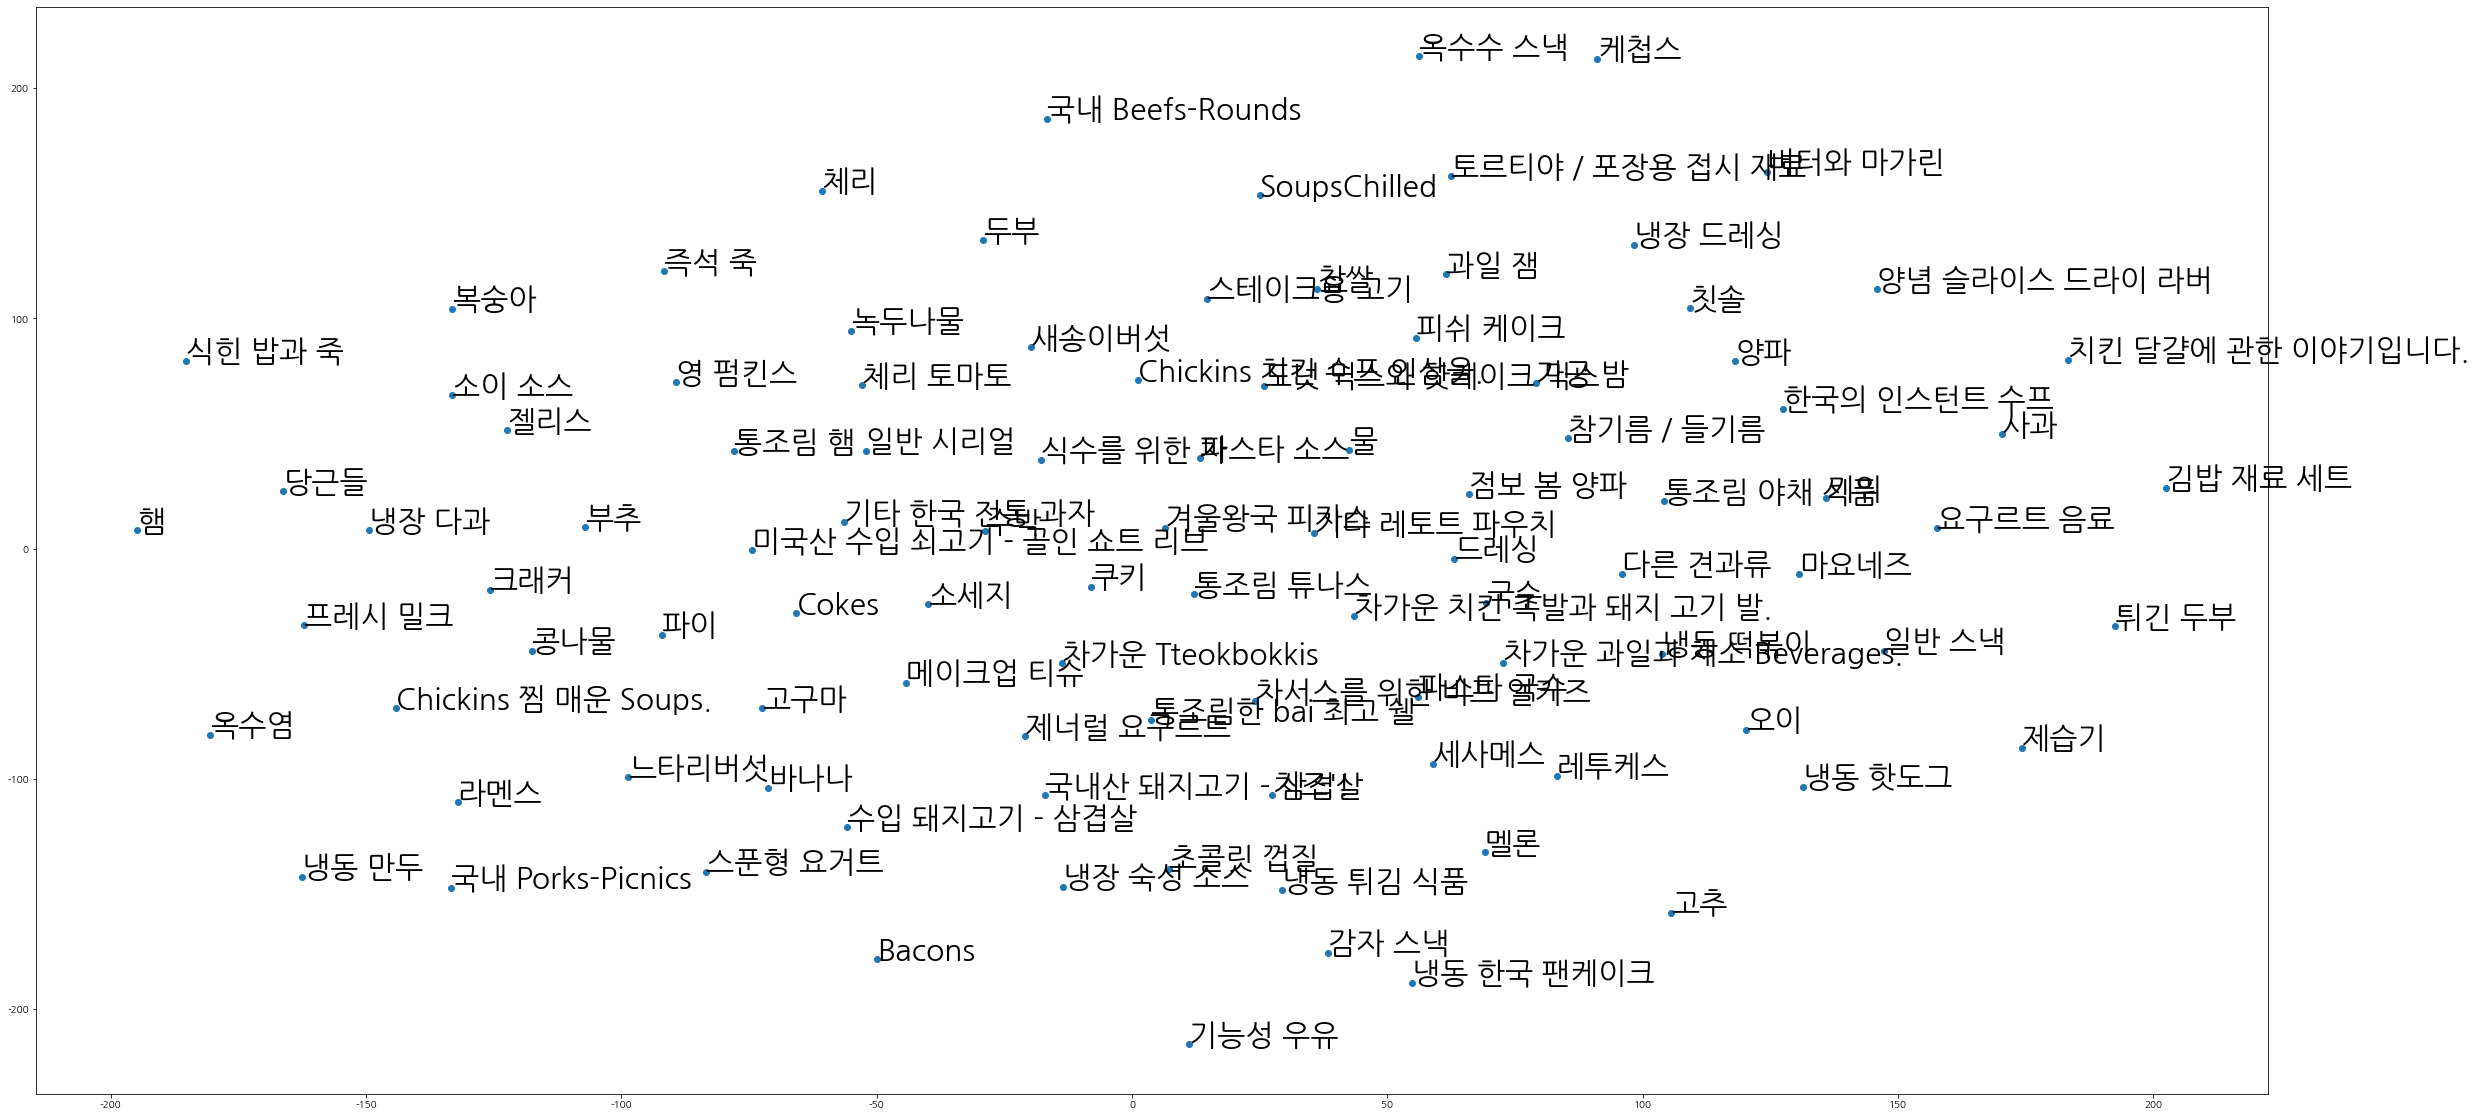

In [164]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## 온라인 데이터에서 trans_id의 결측치 존재

In [92]:
online.loc[(online.clnt_id==21922)&(online.trans_id.notnull())]['trans_id'].value_counts()

39789.0    2
90411.0    1
51249.0    1
90418.0    1
Name: trans_id, dtype: int64

In [91]:
trade.loc[trade.clnt_id==21922]['trans_id'].value_counts()

102455    6
39789     4
104999    4
90418     3
51249     3
90411     2
Name: trans_id, dtype: int64

In [88]:
events.loc[(events.clnt_id==21922)&(events.trans_id.notnull())]['trans_id'].value_counts()

39789.0    8
90418.0    3
51249.0    3
90411.0    2
Name: trans_id, dtype: int64

In [21]:
item = item[['pd_c', 'clac_nm3'] ]
item.head()

,pd_c,clac_nm3
0,1,Automobile Oil / Additives
1,2,Car Lights
2,3,Car Paint
3,4,Filters
4,5,Wiper Blades


## 분석용 데이터 만들기

In [93]:
online = online[['clnt_id', 'trans_id', 'action_type']]
online.head()

,clnt_id,trans_id,action_type
0,1,NaN,0
1,1,NaN,0
2,1,NaN,0
3,1,NaN,0
4,1,NaN,0


In [94]:
trade = trade[['trans_id', 'pd_c', 'de_dt']]
trade.head()

,trans_id,pd_c,de_dt
0,104999,unknown,20190920
1,104907,unknown,20190920
2,105124,unknown,20190920
3,104010,unknown,20190920
4,105124,0565,20190920


In [95]:
events = pd.merge(online, trade, on='trans_id', how='outer')
events.head()

,clnt_id,trans_id,action_type,pd_c,de_dt
0,1.0,NaN,0.0,NaN,NaN
1,1.0,NaN,0.0,NaN,NaN
2,1.0,NaN,0.0,NaN,NaN
3,1.0,NaN,0.0,NaN,NaN
4,1.0,NaN,0.0,NaN,NaN


In [96]:
events.shape

(3776496, 5)

## 행동 유형 시각화

5.0    750530
2.0    655266
0.0    651638
3.0    596765
1.0    307998
4.0    172240
6.0    158383
7.0      6370
Name: action_type, dtype: int64


<AxesSubplot:xlabel='action_type', ylabel='count'>

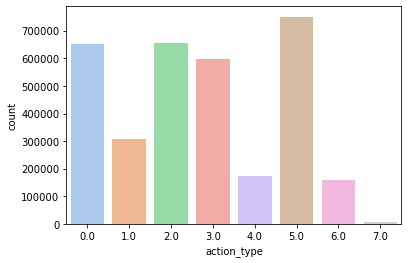

In [27]:
print(events['action_type'].value_counts())
sns.countplot(x= 'action_type', data=events, palette="pastel")

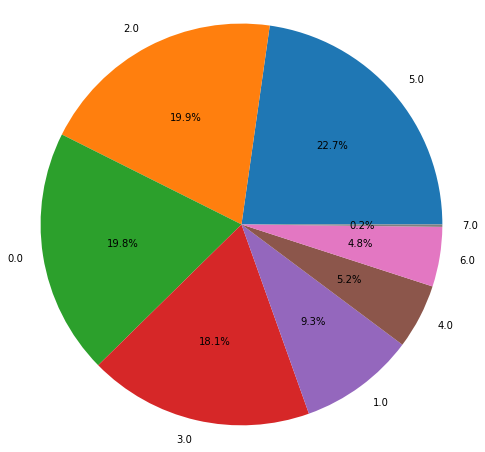

In [30]:
data = events.action_type.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.15, 0.15)  # explode 1st slice
plt.subplots(figsize=(8,8))
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
 
plt.axis('equal')
plt.show()

### 방문자수

In [35]:
all_customers = events['clnt_id'].unique()
print("고유 방문자 수:", all_customers.size)

# all visitors
print('총 방문자 수:', events['clnt_id'].size)

customer_purchased = events[events.trans_id.notnull()].clnt_id.unique()
print('구매한 방문자 수:', customer_purchased.size)

고유 방문자 수: 72400
총 방문자 수: 3776496
구매한 방문자 수: 21078


In [118]:
viewing_visitors_list = list(set(all_customers) - set(customer_purchased))

In [137]:
events

,clnt_id,pd_c,action_type,de_dt
0,NaN,0114,NaN,20190701.0
1,NaN,1395,NaN,20190701.0
2,NaN,1395,NaN,20190701.0
3,NaN,0108,NaN,20190701.0
4,NaN,0546,NaN,20190701.0
...,...,...,...,...
3776491,72415.0,NaN,6.0,NaN
3776492,72415.0,NaN,6.0,NaN
3776493,72418.0,NaN,6.0,NaN
3776494,72419.0,NaN,6.0,NaN


In [138]:
def create_dataframe(visitor_list):
    
    array_for_df = []
    for index in visitor_list:

        #Create that visitor's dataframe once
        v_df = events[events.clnt_id == index]

        temp = []
        #Add the visitor id
        temp.append(index)

        #Add the total number of unique products viewed
        temp.append(v_df[v_df.action_type == 1].pd_c.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.action_type == 1].action_type.count())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.action_type == 6].action_type.count()
        temp.append(number_of_items_bought)

        #Then put either a zero or one if they made a purchase
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)
    
    return pd.DataFrame(array_for_df, columns=['clnt_id', 'num_items_refund', 'refund_count', 'bought_count', 'purchased'])

In [139]:
buying_visitors_df = create_dataframe(customer_purchased)

In [140]:
buying_visitors_df

,clnt_id,num_items_refund,refund_count,bought_count,purchased
0,2.0,1,33,10,1
1,4.0,0,0,1,1
2,9.0,1,22,17,1
3,12.0,0,0,1,1
4,17.0,1,3,1,1
...,...,...,...,...,...
21073,72419.0,0,0,1,1
21074,72423.0,0,0,1,1
21075,72424.0,1,22,2,1
21076,72427.0,1,7,1,1


In [141]:
buying_visitors_df[buying_visitors_df['refund_count']!=0]

,clnt_id,num_items_refund,refund_count,bought_count,purchased
0,2.0,1,33,10,1
2,9.0,1,22,17,1
4,17.0,1,3,1,1
9,24.0,1,7,17,1
12,38.0,1,2,5,1
...,...,...,...,...,...
21069,72400.0,1,7,3,1
21070,72410.0,1,1,1,1
21071,72415.0,1,1,4,1
21075,72424.0,1,22,2,1


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


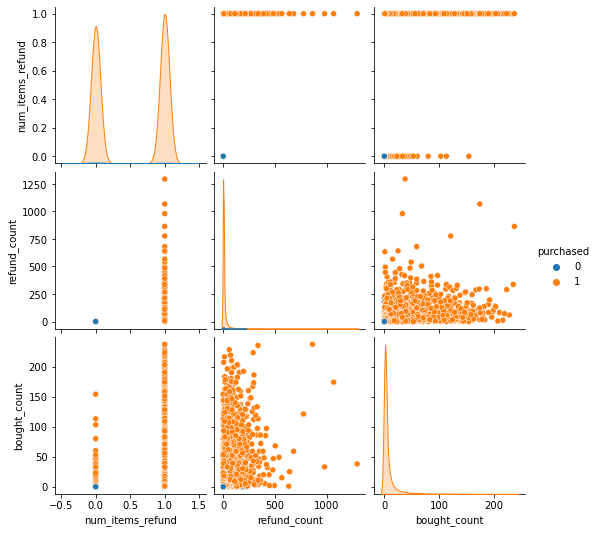

In [142]:
sns.pairplot(buying_visitors_df, x_vars = ['num_items_refund', 'refund_count', 'bought_count'],
             y_vars = ['num_items_refund', 'refund_count', 'bought_count'],  hue = 'purchased')

In [58]:
events.pd_c.notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
3776491     True
3776492     True
3776493     True
3776494     True
3776495     True
Name: pd_c, Length: 3776496, dtype: bool

In [66]:
temp = events[events.pd_c.notnull()]

In [67]:
grouped = temp.groupby('action_type')['pd_c'].apply(list)
grouped

action_type
6.0    [0092, 0092, 0151, 0351, 0189, 0186, 0092, 139...
7.0    [unknown, 1558, unknown, 1558, unknown, 1558, ...
Name: pd_c, dtype: object

### 구매가 가장 많은 제품

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

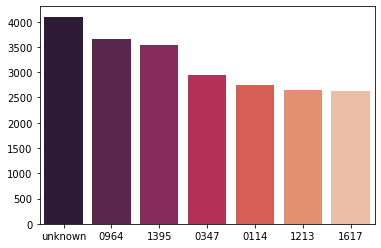

In [99]:
import operator
transaction = grouped[6]
# creating dictionary for key value pair 
count_transaction ={}
#since addtocart is a list, we will convert it into numpy array for further manipulations
transaction = np.array(transaction[:])
#counting uniques values of addtocart items of this numpy addtocart array
unique, counts = np.unique(transaction, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_transaction = dict(zip(unique, counts))
#sorting the dictionary
sort_count_transaction = sorted(count_transaction.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_transaction[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_transaction[:7]]
sns.barplot(x, y, order=x, palette="rocket")

### 환불이 가장 많은 제품

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

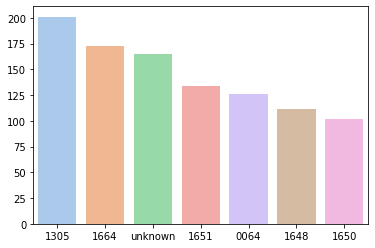

In [97]:
addtocart = grouped[7]
# creating dictionary for key value pair 
count_addtocart ={}
#since addtocart is a list, we will convert it into numpy array for further manipulations
addtocart = np.array(addtocart[:])
#counting uniques values of addtocart items of this numpy addtocart array
unique, counts = np.unique(addtocart, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_addtocart = dict(zip(unique, counts))
#sorting the dictionary
sort_count_addtocart = sorted(count_addtocart.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_addtocart[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_addtocart[:7]]
sns.barplot(x, y, order=x, palette="pastel")

In [100]:
events.columns

Index(['clnt_id', 'trans_id', 'action_type', 'pd_c', 'de_dt'], dtype='object')

In [102]:
customer_purchased = events[events.trans_id.notnull()].clnt_id.unique()

#lets create a list of purchased items
purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events.loc[(events.clnt_id == customer) & (events.trans_id.notnull())].pd_c.values))

In [103]:
purchased_items[:3]

[['0092',
  '0092',
  '0151',
  '0351',
  '0189',
  '0186',
  '0092',
  '1395',
  '1395',
  '1395'],
 [nan],
 ['0515',
  '1388',
  '1183',
  '0347',
  '0114',
  '0517',
  '1075',
  '1245',
  '1386',
  '0348',
  '0350',
  '0188',
  '0515',
  '0517',
  '0517',
  '1395',
  '1200']]

In [104]:
def recommend_items(item_id, purchased_items):
    recommendation_list =[]
    for x in purchased_items:
        if item_id in x:
            recommendation_list +=x
    
    # remove the pass item from the list and merge the above created list
    recommendation_list = list(set(recommendation_list) - set([item_id]))
    return recommendation_list

In [112]:
recommend_items('0350', purchased_items)[:10]

[nan, '1195', '0946', '0570', '1266', '0358', '0185', '0379', '1112', '1064']

In [113]:
events.head(5)

,clnt_id,trans_id,action_type,pd_c,de_dt
0,1.0,NaN,0.0,NaN,NaN
1,1.0,NaN,0.0,NaN,NaN
2,1.0,NaN,0.0,NaN,NaN
3,1.0,NaN,0.0,NaN,NaN
4,1.0,NaN,0.0,NaN,NaN
